In [2]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
fig_store = "../MasterThesis/Thesis/figures/ModelsOfPeer/"

# Compare

PyMC

graders:time
20:14.8
40:31.1
100:80.7

MH

graders:time
100:8.941389

Gibbs

graders:time
100:3.834045

Extended Gibbs

graders:time
100:56.172505

In [ ]:
63.589409/489.620924

In [ ]:
489.620924/3

Cython

graders:time
20:1.441123
100:6.071004

Numpy

graders:time
10:34.483265
20:63.801284
25:78.431979
50:151.981305
100:299.384263

PyPy MH

graders:time
100:0.823724

PyPy Gibbs

graders:time
100:0.671064

PyPy Extended Gibbs

graders:time
100:2.654069

In [6]:
67.7/np.mean([15.913485,15.941484,16.028075])

4.2415849752576307

In [35]:
data = [('PG (PyMC)',67.7),('PG',[6.933775,6.762796,7.049993]),('PG2',[1.640868,1.432870,1.717588]),('PG3',[15.913485,15.941484,16.028075])]

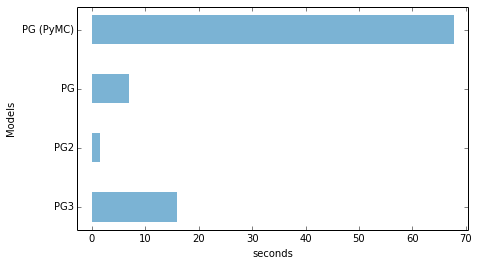

In [36]:
with PdfPages(fig_store + "ModelsSpeedCompare.pdf") as pdf:
    fig = plt.figure(figsize(7,4))
    labels = list()
    values = list()
    width = 0.5
    data.reverse()
    #data.sort(key=lambda x : x[1], reverse=True)
    for (l, v) in data:
        labels.append(l)
        values.append(np.mean(v))
    ind = np.arange(len(data)) 
    plt.barh(ind + width,values,height = width,alpha = 0.65, color = "#348ABD",linewidth=0)
    plt.yticks(ind + width*1.5, labels)
    plt.xlabel('seconds')
    plt.ylabel('Models')
    #plt.yscale('log', nonposy='clip')
    plt.margins(0.04)
    plt.show()
    pdf.savefig(fig,bbox_inches='tight')

In [198]:
np.mean([6.933775,6.762796,7.049993])/np.mean([0.880314,0.757480,0.684637])

8.933123955028158

In [197]:
np.mean([1.640868,1.432870,1.717588])/np.mean([0.358682,0.326529,0.341418])

4.667047200108315

In [199]:
np.mean([15.913485,15.941484,16.028075])/np.mean([1.353521,1.281770,1.167487])

12.591595933288769

In [201]:
np.mean([15.913485,15.941484,16.028075])

15.961014666666665

In [37]:
data = [('PG',[6.933775,6.762796,7.049993]),('PyPy PG',[0.880314,0.757480,0.684637]),
        ('PG2',[1.640868,1.432870,1.717588]),('PyPy PG2',[0.358682,0.326529,0.341418]),
        ('PG3',[15.913485,15.941484,16.028075]),('PyPy PG3',[1.353521,1.281770,1.167487])]
data.reverse()

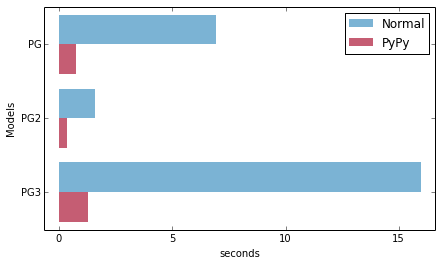

In [39]:
with PdfPages(fig_store + "PyPyCompareSpeed.pdf") as pdf:
    fig = plt.figure(figsize(7,4))
    labels = ['PG','PG2','PG3']
    labels.reverse()
    values_1 = list()
    values_2 = list()
    width = 0.4
    for i, (l, v) in enumerate(data):
        if i % 2 == 0:
            values_1.append(np.mean(v))
        else:
            values_2.append(np.mean(v))
    ind = np.arange(len(data)/ 2)
    plt.barh(ind + width*1.5,values_2,height = width,alpha = 0.65, color = "#348ABD",label="Normal",linewidth=0)
    plt.barh(ind + width*0.5,values_1,height = width,alpha = 0.65, color = "#A60628",label="PyPy",linewidth=0)
    ind = np.arange(len(data))  
    plt.yticks(ind + width*1.5, labels)
    plt.xlabel('seconds')
    plt.ylabel('Models')
    plt.legend()
    plt.margins(0.04)
    plt.show()
    pdf.savefig(fig,bbox_inches='tight')

In [ ]:
data = [('PyPy MH',0.823724),
        ('PyPy Gibbs',0.671064),
        ('PyPy Ext. Gibbs',2.654069)]
data.reverse()

In [ ]:
labels = list()
values = list()
figsize(7,5)
width = 0.5
#data.sort(key=lambda x : x[1], reverse=True)
for (l, v) in data:
    labels.append(l)
    values.append(v)
ind = np.arange(len(data)) 
plt.barh(ind + width,values,height = width,alpha = 0.65, color = "#A60628")
plt.yticks(ind + width*1.5, labels)
plt.ylabel('seconds')
plt.xlabel('')
plt.margins(0.02)
plt.show()

In [194]:

# Ext gibbs, gibbs, MH
data = [("Base",[[16.391281,14.687160,13.221359],[1.654619,1.371196,1.352810],[6.991439,5.757080,5.972307]]), 
        ("Double Q",[[31.744715,26.544267,26.462529],[1.613914,1.447797,1.420508],[7.297817,5.989157,5.952376]]),
        ("Double G",[[26.039961,25.781691,26.955399],[2.788729,2.837696,2.812466],[11.910357,11.421743,11.438066]]),
        ("Double G pr g",[[24.003236,22.361297,19.927950],[2.701890,2.348659,2.257807],[11.771779,9.244832,9.228990]]),
       ]

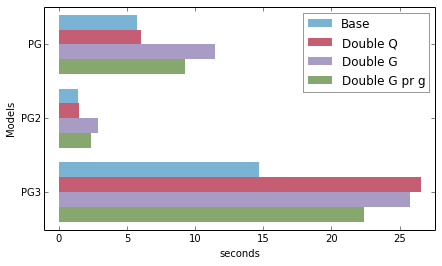

In [196]:
with PdfPages(fig_store + "CompareSpeedScaling.pdf") as pdf:
    fig = plt.figure(figsize(7,4))
    labels = ['PG','PG2','PG3']
    colors = ["#348ABD","#A60628","#7A68A6","#467821"]
    legends = map(lambda x: x[0], data)
    data_ = map(lambda x: x[1], data)
    labels.reverse()
    width = 0.8 / len(data_)
    ind = np.arange(len(labels))
    ind = ind - 0.5
    for k, d in enumerate(data_):
        plt.barh(ind + width + width*len(data) - width*k ,map(lambda x: np.mean(x[1]), d), height = width, alpha = 0.65, 
                 color = colors[k],label=legends[k],linewidth=0)
    ind = np.arange(len(data))  
    plt.yticks(ind + width*1.5, labels)
    plt.xlabel('seconds')
    plt.ylabel('Models')
    leg = plt.legend(loc=1)
    leg.get_frame().set_alpha(0.4)
    plt.margins(0.04)
    plt.show()
    pdf.savefig(fig,bbox_inches='tight')